# Data Analysis with Pandas

### Authors

###### Noemi Benci
Bachelor's Degree in Statistics.

###### Federico Pirona 
Bachelor's Degree in Statistics.

## Introduction
This analysis focuses on the spread of SARS-CoV-2 in Italy. 
Data are dowloded from these repositories on GitHub
- https://github.com/pcm-dpc/COVID-19/blob/master/dati-json/dpc-covid19-ita-regioni.json (Data for regions)
- https://github.com/pcm-dpc/COVID-19/blob/master/dati-json/dpc-covid19-ita-province.json (Data for province)

The data are updated every day from February, 24 2020 to June, 17, 2020 by the Depatment of the Civil Protecition. 
Data regards some day-by-day counts about the amount of infected, of deaths, of recovered and other conditions.
It has a natural tree structure because for each region there are one or more provinces and each pair is recorded daily. 

The analysis starts visualizing variables and the structures of the two datasets. 
Then we show some useful graphical representation of the data. After that we provide some data manipulation to get data more handle. 
Finally we combine together the two datasets and use a hierarchical indexing to make the dataset more readable.

## Loading data

In [598]:
import json                                           # to open file json
import pandas as pd                                   # to manage data
import numpy as np                                    # to create array
import matplotlib
import matplotlib.pyplot as plt                       # to make plots
from datetime import date, datetime                   # to convert strings in dates
import seaborn as sns                                 # library for nicer plots
import zipfile
import requests
import io
import os
import geopandas as gpd                               # to add Italy map
import geoplot                                        # to add Italy map
sns.set()
%matplotlib inline

In [599]:
with open('./dati/dati-json/dpc-covid19-ita-province.json') as f:
    d1 = json.load(f)

In [600]:
with open('./dati/dati-json/dpc-covid19-ita-regioni.json') as f:
    d2 = json.load(f)

### Visualize data as dictionary

In [601]:
d1[:2]

[{'data': '2020-02-24T18:00:00',
  'stato': 'ITA',
  'codice_regione': 13,
  'denominazione_regione': 'Abruzzo',
  'codice_provincia': 66,
  'denominazione_provincia': "L'Aquila",
  'sigla_provincia': 'AQ',
  'lat': 42.35122196,
  'long': 13.39843823,
  'totale_casi': 0,
  'note': None},
 {'data': '2020-02-24T18:00:00',
  'stato': 'ITA',
  'codice_regione': 13,
  'denominazione_regione': 'Abruzzo',
  'codice_provincia': 67,
  'denominazione_provincia': 'Teramo',
  'sigla_provincia': 'TE',
  'lat': 42.6589177,
  'long': 13.70439971,
  'totale_casi': 0,
  'note': None}]

In [602]:
d2[:2]

[{'data': '2020-02-24T18:00:00',
  'stato': 'ITA',
  'codice_regione': 13,
  'denominazione_regione': 'Abruzzo',
  'lat': 42.35122196,
  'long': 13.39843823,
  'ricoverati_con_sintomi': 0,
  'terapia_intensiva': 0,
  'totale_ospedalizzati': 0,
  'isolamento_domiciliare': 0,
  'totale_positivi': 0,
  'variazione_totale_positivi': 0,
  'nuovi_positivi': 0,
  'dimessi_guariti': 0,
  'deceduti': 0,
  'casi_da_sospetto_diagnostico': None,
  'casi_da_screening': None,
  'totale_casi': 0,
  'tamponi': 5,
  'casi_testati': None,
  'note': None},
 {'data': '2020-02-24T18:00:00',
  'stato': 'ITA',
  'codice_regione': 17,
  'denominazione_regione': 'Basilicata',
  'lat': 40.63947052,
  'long': 15.80514834,
  'ricoverati_con_sintomi': 0,
  'terapia_intensiva': 0,
  'totale_ospedalizzati': 0,
  'isolamento_domiciliare': 0,
  'totale_positivi': 0,
  'variazione_totale_positivi': 0,
  'nuovi_positivi': 0,
  'dimessi_guariti': 0,
  'deceduti': 0,
  'casi_da_sospetto_diagnostico': None,
  'casi_da_scre

### Visualize data as Pandas DataFrames

In [603]:
province = pd.DataFrame(d1)
province.sample(10)

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note
14185,2020-06-13T17:00:00,ITA,9,Toscana,46,Lucca,LU,43.844323,10.501514,1366,None
14401,2020-06-15T17:00:00,ITA,14,Molise,70,Campobasso,CB,41.557748,14.659161,361,None
5775,2020-04-09T17:00:00,ITA,15,Campania,62,Benevento,BN,41.129700,14.781517,145,None
16548,2020-07-01T17:00:00,ITA,6,Friuli Venezia Giulia,93,Pordenone,PN,45.954435,12.660029,704,
727,2020-02-29T17:00:00,ITA,16,Puglia,992,In fase di definizione/aggiornamento,None,NaN,NaN,0,None
4327,2020-03-28T17:00:00,ITA,19,Sicilia,994,In fase di definizione/aggiornamento,None,NaN,NaN,0,None
8621,2020-05-01T17:00:00,ITA,7,Liguria,987,In fase di definizione/aggiornamento,None,NaN,NaN,6,None
702,2020-02-29T17:00:00,ITA,11,Marche,44,Ascoli Piceno,AP,42.853223,13.576911,0,None
6655,2020-04-15T17:00:00,ITA,5,Veneto,999,In fase di definizione/aggiornamento,None,NaN,NaN,329,None
10269,2020-05-14T17:00:00,ITA,8,Emilia-Romagna,984,In fase di definizione/aggiornamento,None,NaN,NaN,0,None


In [604]:
region = pd.DataFrame(d2)
region.sample(10)

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,...,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati,note
1030,2020-04-13T17:00:00,ITA,17,Basilicata,40.639471,15.805148,64,12,76,194,...,-7,4,31,18,NaN,NaN,319,4545,NaN,None
1319,2020-04-26T17:00:00,ITA,9,Toscana,43.769231,11.255889,677,158,835,5234,...,-77,132,2300,778,NaN,NaN,9147,127394,99751.0,None
1963,2020-05-27T17:00:00,ITA,14,Molise,41.557748,14.659161,3,2,5,161,...,-8,2,246,22,NaN,NaN,434,13629,13087.0,None
1750,2020-05-17T17:00:00,ITA,7,Liguria,44.411493,8.932699,360,24,384,2072,...,-77,48,5348,1355,NaN,NaN,9159,80154,47381.0,None
870,2020-04-05T17:00:00,ITA,11,Marche,43.616760,13.518875,987,151,1138,2440,...,81,123,287,599,NaN,NaN,4464,15252,NaN,None
1375,2020-04-29T17:00:00,ITA,14,Molise,41.557748,14.659161,17,1,18,175,...,-2,0,83,21,NaN,NaN,297,5910,5857.0,None
1977,2020-05-28T17:00:00,ITA,15,Campania,40.839566,14.250850,260,6,266,746,...,-134,4,3355,410,NaN,NaN,4777,189068,90670.0,None
1154,2020-04-18T17:00:00,ITA,5,Veneto,45.434905,12.338452,1287,190,1477,8967,...,-174,318,4189,1059,NaN,NaN,15692,247329,NaN,None
973,2020-04-10T17:00:00,ITA,7,Liguria,44.411493,8.932699,1076,151,1227,2074,...,48,171,1181,709,NaN,NaN,5191,19514,NaN,None
1729,2020-05-16T17:00:00,ITA,7,Liguria,44.411493,8.932699,369,26,395,2138,...,-70,51,5232,1346,NaN,NaN,9111,78068,46304.0,None


## First look to 'Province' Dataset
Let's discover some info about the available variables and their nature.

In [605]:
province.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17404 entries, 0 to 17403
Data columns (total 11 columns):
data                       17404 non-null object
stato                      17404 non-null object
codice_regione             17404 non-null int64
denominazione_regione      17404 non-null object
codice_provincia           17404 non-null int64
denominazione_provincia    17404 non-null object
sigla_provincia            14589 non-null object
lat                        14338 non-null float64
long                       14338 non-null float64
totale_casi                17404 non-null int64
note                       901 non-null object
dtypes: float64(2), int64(3), object(6)
memory usage: 1.5+ MB


In [606]:
province.columns

Index(['data', 'stato', 'codice_regione', 'denominazione_regione',
       'codice_provincia', 'denominazione_provincia', 'sigla_provincia', 'lat',
       'long', 'totale_casi', 'note'],
      dtype='object')

In [607]:
province.describe(include='all')

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note
count,17404,17404,17404.000000,17404,17404.000000,17404,14589,14338.000000,14338.000000,17404.000000,901
unique,134,1,NaN,21,NaN,110,108,NaN,NaN,NaN,8
top,2020-07-02T17:00:00,ITA,NaN,Lombardia,NaN,In fase di definizione/aggiornamento,,NaN,NaN,NaN,
freq,149,17404,NaN,1754,NaN,2562,252,NaN,NaN,NaN,890
mean,NaN,NaN,10.632039,NaN,217.390830,NaN,NaN,42.908522,12.096599,1242.214721,NaN
std,NaN,NaN,6.106430,NaN,354.347908,NaN,NaN,2.631601,2.660639,2548.494597,NaN
min,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,36.925092,7.320149,0.000000,NaN
25%,NaN,NaN,5.000000,NaN,33.000000,NaN,NaN,40.914047,9.828190,48.000000,NaN
50%,NaN,NaN,10.000000,NaN,65.000000,NaN,NaN,43.715532,12.104734,376.000000,NaN
75%,NaN,NaN,16.000000,NaN,98.000000,NaN,NaN,45.185093,14.167546,1196.000000,NaN


The dataset of provinces is composed by 14 720 observations each composed by 12 variables. Each observation is a daily update of the count of cases of Coronavirus for a particular italian city and it provides all the information about the city (geographical location with longitude and latitude, which region does the city belong to) and the number of cases registred on a particular date. 

The dataset contains information of 115 different days for every region (21 unique regions) and province (107 provinces + 1 'In fase di aggiornamento') of Italy. 

On average have been registred 1159 cases per day, with a minimum of 0 and a maximum of about 24 000. 

##### Note that the latitude and the longitude reach as minumum 0. The rows with latitude and/or longitude have to be removed because wrong (each italian city has latitude and longitude different form 0).

In [608]:
province.shape

(17404, 11)

In [609]:
# identifying fake rows because of lat=0
province[province['lat']==0]

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note


In [610]:
# identifying fake rows because of long=0
province[province['long']==0]

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note


In [611]:
# before there were 14720 observation of which 2415 were fake. dropping the fake one we sould have 
province.shape[0] - province[province['long']==0].shape[0]

17404

In [612]:
# same rows with lat=0 and long=0, let's exclude them
province = province.drop(province[province['lat']==0].index)

In [613]:
# let's verify the shape of the clean dataset
province.shape

(17404, 11)

## First look to 'Regions' Dataset

In [614]:
region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2814 entries, 0 to 2813
Data columns (total 21 columns):
data                            2814 non-null object
stato                           2814 non-null object
codice_regione                  2814 non-null int64
denominazione_regione           2814 non-null object
lat                             2814 non-null float64
long                            2814 non-null float64
ricoverati_con_sintomi          2814 non-null int64
terapia_intensiva               2814 non-null int64
totale_ospedalizzati            2814 non-null int64
isolamento_domiciliare          2814 non-null int64
totale_positivi                 2814 non-null int64
variazione_totale_positivi      2814 non-null int64
nuovi_positivi                  2814 non-null int64
dimessi_guariti                 2814 non-null int64
deceduti                        2814 non-null int64
casi_da_sospetto_diagnostico    252 non-null float64
casi_da_screening               252 non-null float64


In [615]:
import math
i = 0
while math.isnan(region['casi_testati'][i]):
    i += 1
print('last nan', region['data'][i-1])
print('new day', region['data'][i])

last nan 2020-04-18T17:00:00
new day 2020-04-19T17:00:00


We can see that 'casi_testati' has many null values: indeed these data are available since 19-04-2020

In [616]:
region.columns

Index(['data', 'stato', 'codice_regione', 'denominazione_regione', 'lat',
       'long', 'ricoverati_con_sintomi', 'terapia_intensiva',
       'totale_ospedalizzati', 'isolamento_domiciliare', 'totale_positivi',
       'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti',
       'deceduti', 'casi_da_sospetto_diagnostico', 'casi_da_screening',
       'totale_casi', 'tamponi', 'casi_testati', 'note'],
      dtype='object')

In [617]:
region.describe(include='all')

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,...,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati,note
count,2814,2814,2814.000000,2814,2814.000000,2814.000000,2814.000000,2814.000000,2814.000000,2814.000000,...,2814.000000,2814.000000,2814.000000,2814.000000,252.000000,252.000000,2814.000000,2.814000e+03,1659.000000,80
unique,134,1,NaN,21,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73
top,2020-04-07T17:00:00,ITA,NaN,Sicilia,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NEL TOTALE CASI POSITIVI SONO COMPRESI ULTERIO...
freq,21,2814,NaN,134,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
mean,NaN,NaN,11.857143,NaN,43.046293,12.225955,578.142146,65.809168,643.951315,1876.597726,...,5.148543,85.942075,4106.121891,1056.248045,10613.468254,850.345238,7682.918977,1.089229e+05,107804.699819,NaN
std,NaN,NaN,6.274913,NaN,2.489223,2.659420,1501.508623,158.730424,1654.356095,3979.255620,...,212.753108,227.382936,9191.103597,2752.942360,19254.325845,1437.334115,15725.166645,1.735713e+05,112063.376658,NaN
min,NaN,NaN,1.000000,NaN,38.115697,7.320149,0.000000,0.000000,0.000000,0.000000,...,-5339.000000,-229.000000,0.000000,0.000000,400.000000,0.000000,0.000000,0.000000e+00,3482.000000,NaN
25%,NaN,NaN,7.000000,NaN,41.125596,11.121231,18.000000,2.000000,20.000000,81.000000,...,-22.000000,1.000000,66.250000,27.000000,1428.000000,3.000000,584.750000,8.112500e+03,35127.500000,NaN
50%,NaN,NaN,12.000000,NaN,43.616760,12.388247,99.000000,12.000000,114.000000,481.500000,...,0.000000,11.000000,1013.000000,242.000000,3309.000000,112.000000,2611.500000,4.541800e+04,65476.000000,NaN
75%,NaN,NaN,17.000000,NaN,45.434905,13.768136,425.750000,58.000000,471.750000,1667.000000,...,21.000000,66.000000,3373.750000,700.750000,9014.500000,1267.500000,6715.500000,1.253292e+05,143601.000000,NaN


The dataset of Regions contains 2415 rows and 20 variables each. Every observation is an update of some numbers about the spread of Coronavirus in Italy. 
For 115 days and for all italian regions we have:
- number of hospitalized with sympthoms  (on average 661 per day, with minimum 0 and maximum of about 12 100);
- number of people in intensive care unit (on average 75 per day, with minimum 0 and maximum of about 1 400);
- number of hospitalized (on average 737 per day, with minimum 0 and maximum 13 400);
- number of people house-isolated (on average 2 100 per day, with minimum 0 and maximum of about 30 400);
- number of tested positive  (on average 2 800 per day, with minimum 0 and maximum of about 37 300);
- variation of new tested positive (on average 9 per day, with minimum 0 and maximum of about 1 950);
- number of new tested positive (on average 98 per day, with minimum 0 and maximum of about 3 250);
- number discharged healed (on average 3 300 per day, with a minimum of 0 and a maximum of about 60 850);
- number of deaths (on average 950 per day, with a minimum of 0 and a maximum of about 16 500);
- number of total cases (on average 7 100 per day, with a minimum of 0 and a mamimum of about 92 300);
- number of swabs (on average 85 500 per day, with a minimum of 0 and a maximum of about 917 900);
- number of tested cases (on average 93 800 per day, with a minimum of 3 500 and a maximum of about 547 100).

This dataset can be integrated with the province dataset to integrate the information about the number of cases within the cities of a region.

## Some Graphical Representations

First it is necessary to trasform the date in a 'datetime' object.

In [618]:
display(region['data'][0], province['data'][0])   # check the date format

'2020-02-24T18:00:00'

'2020-02-24T18:00:00'

In [619]:
# add new date as datetime object
region['date'] = [datetime.strptime(x, "%Y-%m-%dT%H:%M:%S").date() for x in region['data']] 
region = region.drop('data', axis=1)
province['date'] = [datetime.strptime(x, "%Y-%m-%dT%H:%M:%S").date() for x in province['data']] 
province = province.drop('data', axis=1)

In [620]:
region['date'].head()

0    2020-02-24
1    2020-02-24
2    2020-02-24
3    2020-02-24
4    2020-02-24
Name: date, dtype: object

### Number of total cases and deaths during the time.
 No distinctions between regions or cities.

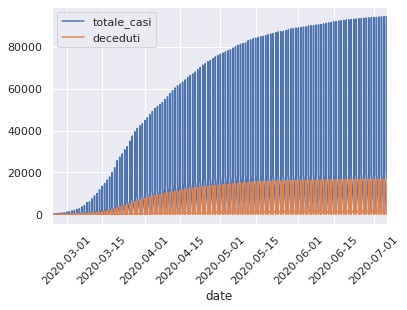

In [621]:
region.plot(y=['totale_casi', 'deceduti'], x='date', rot=45);  

From the plot we see that the number of people infected by the Covid-19 has increased very rapidly in the first month (from the 1st of March to the first of April) and that it has continued increasing quite rapidely. The number of deaths has increased in the fist two months but now it seems quite constant.

### Time series of the counts provided
Distinction by regions

In [622]:
regions_names = region['denominazione_regione'].unique() 

# define the figure size and grid layout properties
figsize = (20, 40)
cols = 2
rows = len(regions_names) // cols + 1

def trim_axs(axs, N):
    """ Reduce *axs* to *N* Axes. 
    All further Axes are removed from the figure.
    """
    axs = axs.flat
    for ax in axs[N:]:
        ax.remove()
    return axs[:N]

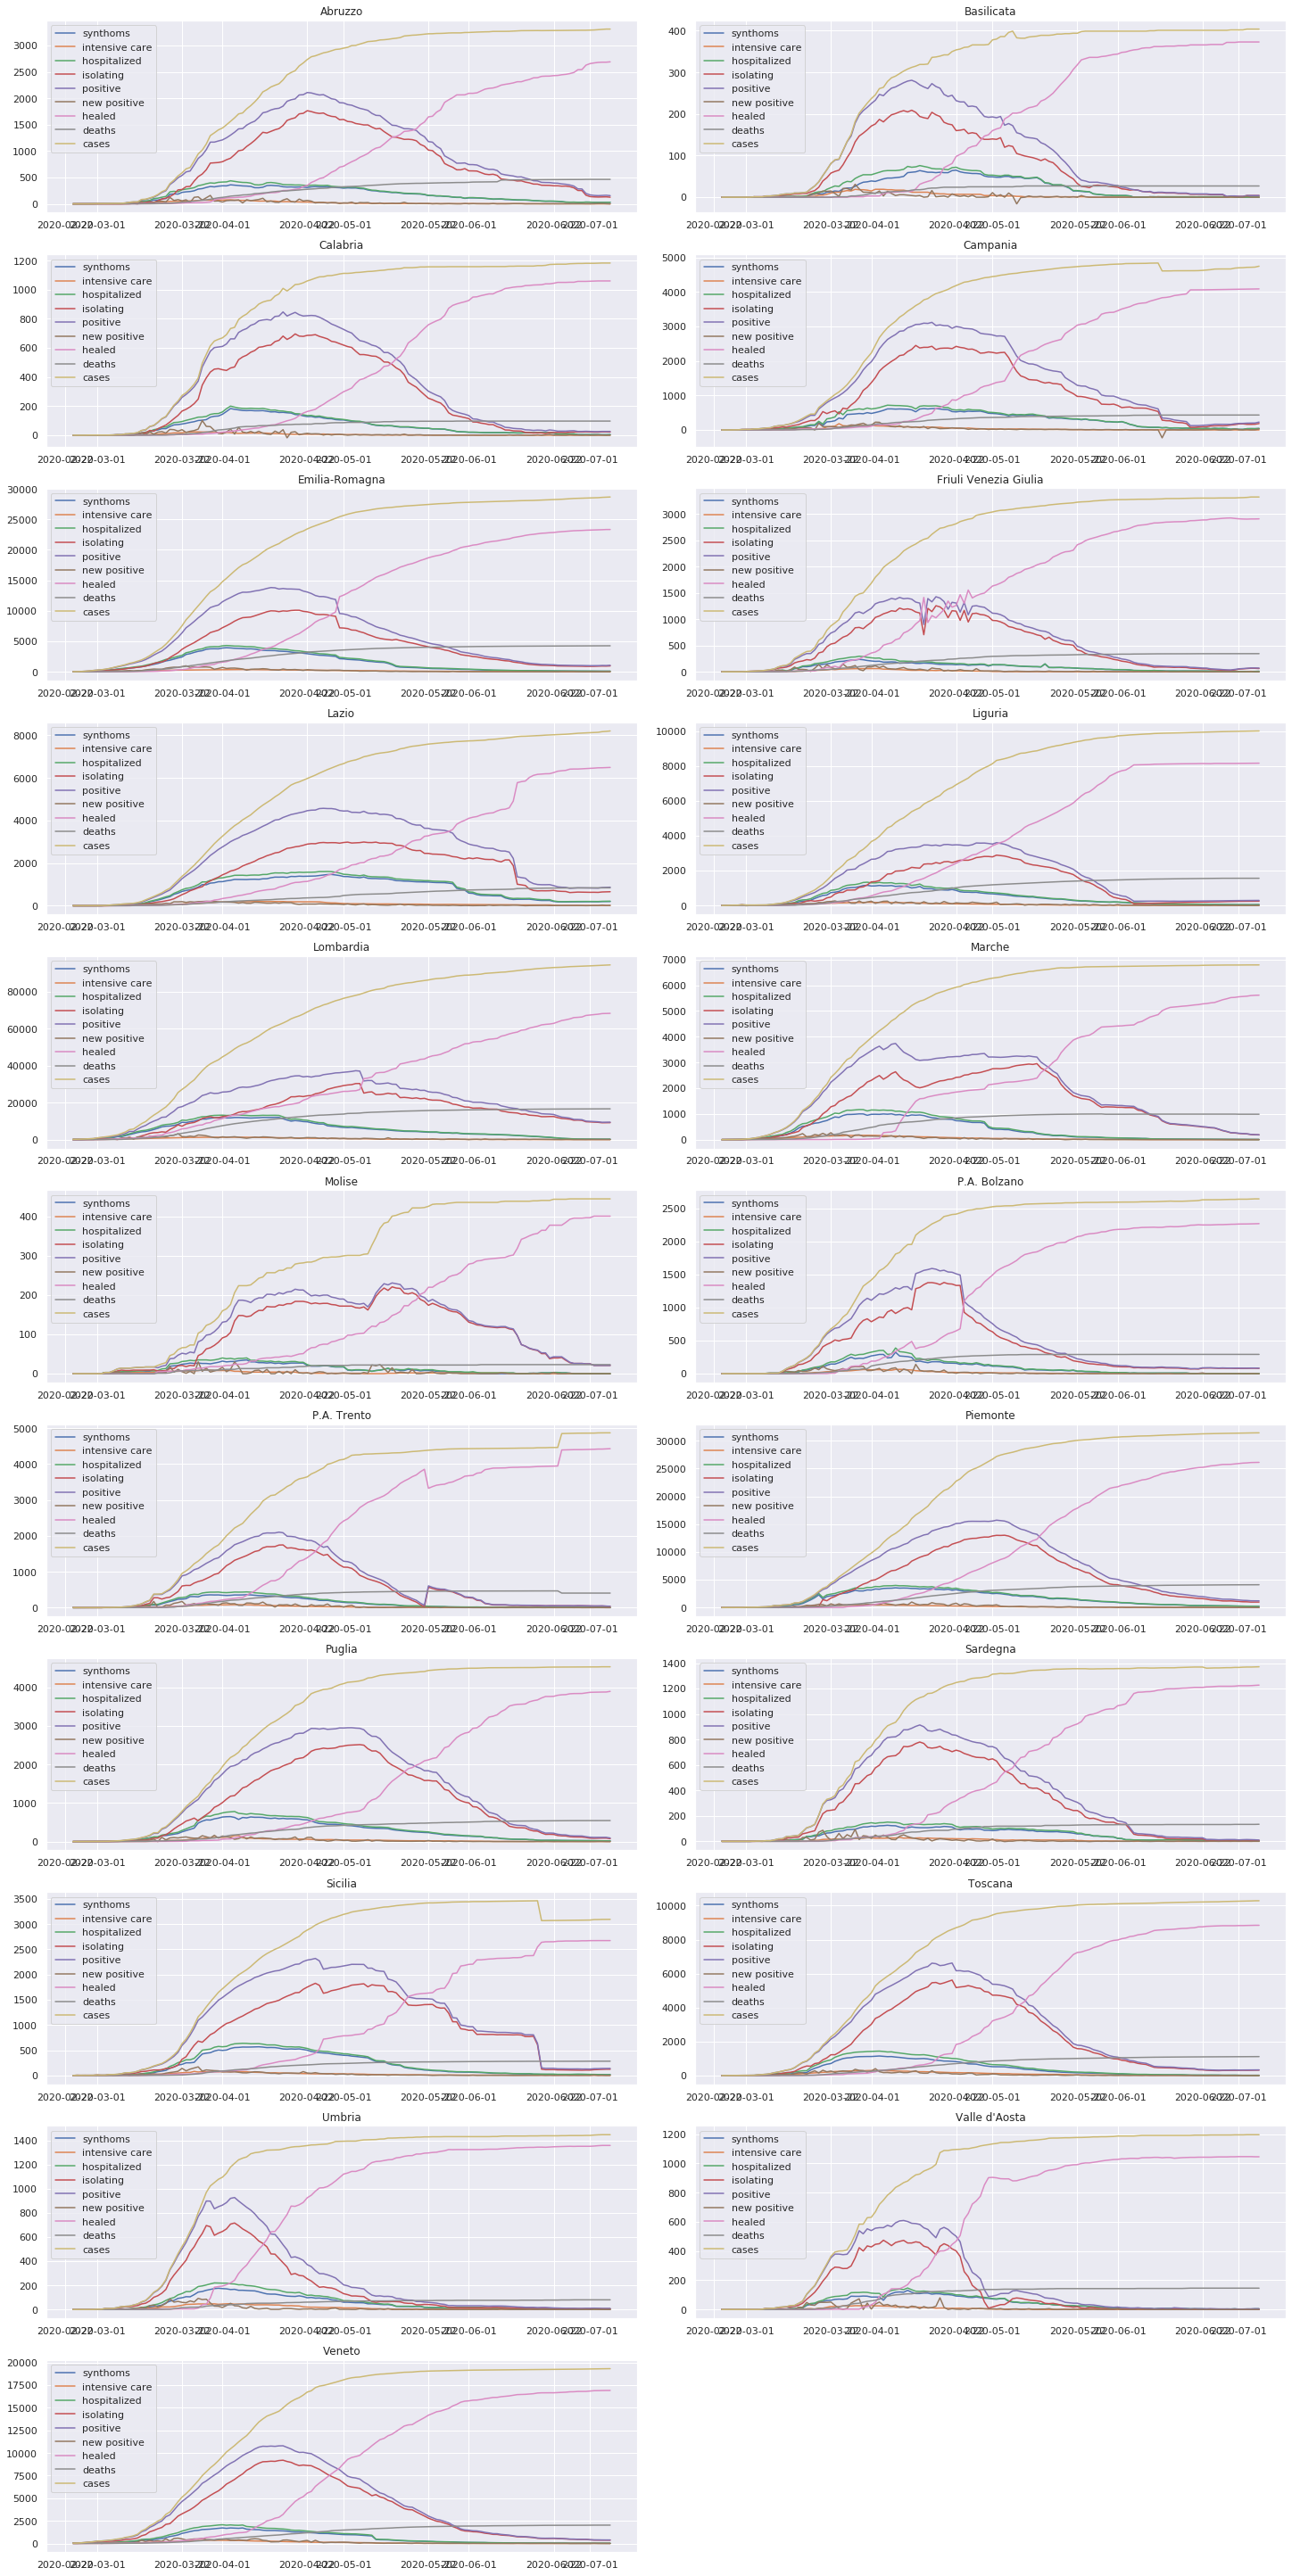

In [623]:
fig1, axs = plt.subplots(rows, cols, figsize=figsize, constrained_layout=True)
axs = trim_axs(axs, len(regions_names))
for ax, reg in zip(axs, regions_names):
    ax.set_title(str(reg))
    df_r = region[region['denominazione_regione']==reg]
    ax.plot(df_r['date'], df_r['ricoverati_con_sintomi'], label='synthoms')
    ax.plot(df_r['date'], df_r['terapia_intensiva'], label='intensive care')     
    ax.plot(df_r['date'], df_r['totale_ospedalizzati'], label='hospitalized')   
    ax.plot(df_r['date'], df_r['isolamento_domiciliare'], label='isolating')
    ax.plot(df_r['date'], df_r['totale_positivi'], label='positive')
    ax.plot(df_r['date'], df_r['nuovi_positivi'], label='new positive')
    ax.plot(df_r['date'], df_r['dimessi_guariti'], label='healed')
    ax.plot(df_r['date'], df_r['deceduti'], label='deaths')
    ax.plot(df_r['date'], df_r['totale_casi'], label='cases') 
    ax.legend()

As we can see the values are very different between regions. Lombardy has very higher values for quite all the counts evaluated. 
Form the plots we can say that the regions in which we find high values (apart from Lombardy) are Veneto, Piedmont and Emilia-Romagna.

Some variables seem to be cumulative, for instance in the plot total cases, healed and deaths always grow. It can be useful to trasform this cumulative values into frequencies.

In [626]:
cols = ['dimessi_guariti', 'deceduti', 'totale_casi', 'tamponi', 'casi_testati']

dailyincr = pd.DataFrame(region[['dimessi_guariti', 'deceduti', 'totale_casi', 
                                 'tamponi', 'casi_testati']], index=region.index, columns = cols)

n = len(region.denominazione_regione.unique())
for var in cols:
    for j in range(n):
        for i in range(j, dailyincr.shape[0]-n, n):
            if i <= n:
                dailyincr[var].values[i] = region[var].values[i] 
            else:
                dailyincr[var].values[i] = region[var].values[i] - region[var].values[i-n]
dailyincr.describe()

,dimessi_guariti,deceduti,totale_casi,tamponi,casi_testati
count,2814.000000,2814.000000,2814.000000,2.814000e+03,1638.000000
mean,136.584577,24.779673,171.794598,4.015191e+03,3586.653846
std,1526.266632,341.536256,2033.689492,3.387613e+04,25131.006319
min,-531.000000,-61.000000,-394.000000,-2.001000e+03,-17122.000000
25%,1.000000,0.000000,1.000000,3.410000e+02,490.500000
50%,11.000000,2.000000,12.000000,1.099500e+03,966.500000
75%,58.000000,8.000000,71.000000,2.583750e+03,2081.500000
max,68335.000000,16700.000000,94527.000000,1.088960e+06,651688.000000


In the summary of this new data, we can see that some values are negative. This is an error, in fact they are cumulative variables and their frequencies must be positive. Let's see if they are actually errors. 

In [627]:
dailyincr.describe(percentiles=[0.01,0.05,0.1])

,dimessi_guariti,deceduti,totale_casi,tamponi,casi_testati
count,2814.000000,2814.000000,2814.000000,2.814000e+03,1638.000000
mean,136.584577,24.779673,171.794598,4.015191e+03,3586.653846
std,1526.266632,341.536256,2033.689492,3.387613e+04,25131.006319
min,-531.000000,-61.000000,-394.000000,-2.001000e+03,-17122.000000
1%,-1.000000,0.000000,0.000000,0.000000e+00,0.000000
5%,0.000000,0.000000,0.000000,5.000000e+00,123.700000
10%,0.000000,0.000000,0.000000,4.900000e+01,231.000000
50%,11.000000,2.000000,12.000000,1.099500e+03,966.500000
max,68335.000000,16700.000000,94527.000000,1.088960e+06,651688.000000


All the variables have only few negative values, so we can hypothesize that they are actually errors. 
We can choose to replace all negative values with 0. 

In order to correct these errors we can add few lines in the previous code. We change both 'region' and 'dailyincr' at the same time. 

In [628]:
cols = ['dimessi_guariti', 'deceduti', 'totale_casi', 'tamponi', 'casi_testati']

dailyincr = pd.DataFrame(region[['dimessi_guariti', 'deceduti', 'totale_casi', 
                                 'tamponi', 'casi_testati']], index=region.index, columns = cols)

n = len(region.denominazione_regione.unique())
for var in cols:
    for j in range(n):
        for i in range(j, dailyincr.shape[0]-n, n):
            if i <= n:
                dailyincr[var].values[i] = region[var].values[i] 
            else:
                diff = region[var].values[i] - region[var].values[i-n]
                if diff < 0:                                            # this 'if' checks for errors:
                    region.loc[i, var] = region.loc[i-n, var]           # some frequency of the cumulative 
                else:                                                   # variables resulted negative
                    dailyincr[var].values[i] = diff
dailyincr.describe()

,dimessi_guariti,deceduti,totale_casi,tamponi,casi_testati
count,2814.000000,2814.000000,2814.000000,2.814000e+03,1638.000000
mean,208.488273,40.267591,253.702914,4.081671e+03,4678.441392
std,1653.396307,360.127495,2100.752002,3.389369e+04,26931.490232
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,1.000000,0.000000,2.000000,3.472500e+02,505.000000
50%,13.000000,2.000000,15.000000,1.108000e+03,979.500000
75%,70.750000,9.000000,84.000000,2.626750e+03,2172.500000
max,68335.000000,16700.000000,94527.000000,1.088960e+06,651688.000000


In [629]:
dailyincr

,dimessi_guariti,deceduti,totale_casi,tamponi,casi_testati
0,0,0,0,5,NaN
1,0,0,0,0,NaN
2,0,0,0,1,NaN
3,0,0,0,10,NaN
4,0,0,18,148,NaN
...,...,...,...,...,...
2809,2674,282,3095,222176,180811.0
2810,8841,1114,10287,353862,238175.0
2811,1358,80,1447,100395,67791.0
2812,1045,146,1196,18807,14101.0


Finally we merge dalilyincr to regions.

In [630]:
region = region.join(dailyincr, rsuffix='_daily')
region

,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,...,totale_casi,tamponi,casi_testati,note,date,dimessi_guariti_daily,deceduti_daily,totale_casi_daily,tamponi_daily,casi_testati_daily
0,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,...,0,5,NaN,None,2020-02-24,0,0,0,5,NaN
1,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,...,0,0,NaN,None,2020-02-24,0,0,0,0,NaN
2,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,0,...,0,1,NaN,None,2020-02-24,0,0,0,1,NaN
3,ITA,15,Campania,40.839566,14.250850,0,0,0,0,0,...,0,10,NaN,None,2020-02-24,0,0,0,10,NaN
4,ITA,8,Emilia-Romagna,44.494367,11.341721,10,2,12,6,18,...,18,148,NaN,None,2020-02-24,0,0,18,148,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2809,ITA,19,Sicilia,38.115697,13.362357,14,2,16,123,139,...,3095,222176,180811.0,None,2020-07-06,2674,282,3095,222176,180811.0
2810,ITA,9,Toscana,43.769231,11.255889,12,2,14,318,332,...,10287,353862,238175.0,None,2020-07-06,8841,1114,10287,353862,238175.0
2811,ITA,10,Umbria,43.106758,12.388247,4,0,4,5,9,...,1447,100395,67791.0,None,2020-07-06,1358,80,1447,100395,67791.0
2812,ITA,2,Valle d'Aosta,45.737503,7.320149,4,0,4,1,5,...,1196,18807,14101.0,None,2020-07-06,1045,146,1196,18807,14101.0


### Add population density

We add population data from Istat (January, 1, 2019) https://www.tuttitalia.it/province/popolazione/.

In [631]:
# read the dataset
pop = pd.read_csv('population.csv')
pop.head()

,Provincia,Reg,Popolazione
0,RM\nCittà Metropolitana di\nROMA CAPITALE,LAZ,4.342.212
1,MI\nCittà Metropolitana di\nMILANO,LOM,3.250.315
2,NA\nCittà Metropolitana di\nNAPOLI,CAM,3.084.890
3,TO\nCittà Metropolitana di\nTORINO,PIE,2.259.523
4,BS\nBrescia,LOM,1.265.954


In [632]:
# frist look to the variables
pop.describe(include='all')

,Provincia,Reg,Popolazione
count,107,107,107
unique,107,21,107
top,LO\nLodi,LOM,622.183
freq,1,12,1


The values of the population density (variable 'Popolazione') is seen as a string so it has to be converted

In [633]:
popolazione = []
for p in pop['Popolazione']:
    popolazione.append(int(p.replace('.', ''))) # we remove the dots
pop['Popolazione'] = popolazione                # we replace the values

In [634]:
pop.head()

,Provincia,Reg,Popolazione
0,RM\nCittà Metropolitana di\nROMA CAPITALE,LAZ,4342212
1,MI\nCittà Metropolitana di\nMILANO,LOM,3250315
2,NA\nCittà Metropolitana di\nNAPOLI,CAM,3084890
3,TO\nCittà Metropolitana di\nTORINO,PIE,2259523
4,BS\nBrescia,LOM,1265954


#### Add density information to the dataset 'province'

In [635]:
# the variable 'Provincia' has a different notation so it is necessary change it so that we can use it 
prov = []
for i in pop.index:
    prov.append(pop.Provincia[i][:2])

In [636]:
# we create a dataframe with the initial of the province and its population density
df_pop_prov = pd.DataFrame({'Popolazione': pop.Popolazione, 'sigla_provincia': prov}, columns=['sigla_provincia', 'Popolazione'])
df_pop_prov

,sigla_provincia,Popolazione
0,RM,4342212
1,MI,3250315
2,NA,3084890
3,TO,2259523
4,BS,1265954
...,...,...
102,OR,157707
103,RI,155503
104,GO,139403
105,AO,125666


In [637]:
province_pop = pd.merge(province, df_pop_prov, on='sigla_provincia')
province_pop

,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note,date,Popolazione
0,ITA,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,0,None,2020-02-24,299031
1,ITA,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,0,None,2020-02-25,299031
2,ITA,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,0,None,2020-02-26,299031
3,ITA,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,0,None,2020-02-27,299031
4,ITA,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,0,None,2020-02-28,299031
...,...,...,...,...,...,...,...,...,...,...,...,...
14332,ITA,5,Veneto,29,Rovigo,RO,45.071073,11.790070,444,,2020-07-02,234937
14333,ITA,5,Veneto,29,Rovigo,RO,45.071073,11.790070,444,,2020-07-03,234937
14334,ITA,5,Veneto,29,Rovigo,RO,45.071073,11.790070,444,,2020-07-04,234937
14335,ITA,5,Veneto,29,Rovigo,RO,45.071073,11.790070,444,,2020-07-05,234937


#### Add density information to the dataset 'region'

In [638]:
# we create a dataset with the initial of regions and its population density
df_pop_reg =  pd.DataFrame(pop.groupby('Reg')['Popolazione'].sum().reset_index())
df_pop_reg

,Reg,Popolazione
0,ABR,1311580
1,BAS,234405
2,BOL,531178
3,CAL,1789649
4,CAM,5801692
5,EMR,4459477
6,FVG,1215220
7,LAZ,5593755
8,LIG,601122
9,LOM,9756932


It is necessary to link the abbrevation of regions to the full name. This step is useful to add the population information to the two origina datasets.

In [639]:
df_pop_reg.Reg.unique() 

array(['ABR', 'BAS', 'BOL', 'CAL', 'CAM', 'EMR', 'FVG', 'LAZ', 'LIG',
       'LOM', 'MAR', 'MOL', 'PIE', 'PUG', 'SAR', 'SIC', 'TAA', 'TOS',
       'UMB', 'VDA', 'VEN'], dtype=object)

In [640]:
region['denominazione_regione'].unique()

array(['Abruzzo', 'Basilicata', 'Calabria', 'Campania', 'Emilia-Romagna',
       'Friuli Venezia Giulia', 'Lazio', 'Liguria', 'Lombardia', 'Marche',
       'Molise', 'P.A. Bolzano', 'P.A. Trento', 'Piemonte', 'Puglia',
       'Sardegna', 'Sicilia', 'Toscana', 'Umbria', "Valle d'Aosta",
       'Veneto'], dtype=object)

In [641]:
# we create a dictionary to link the abbrevation to the full name
reg_abbrv = {'ABR': 'Abruzzo','BAS': 'Basilicata','BOL': 'P.A. Bolzano','CAL': 'Calabria','CAM': 'Campania',
       'EMR': 'Emilia-Romagna','FVG': 'Friuli Venezia Giulia','LAZ': 'Lazio','LIG': 'Liguria',
       'LOM': 'Lombardia' ,'MAR': 'Marche','MOL': 'Molise','PIE': 'Piemonte','PUG': 'Puglia','SAR': 'Sardegna',
       'SIC':'Sicilia','TOS': 'Toscana','TAA': 'P.A. Trento','UMB': 'Umbria','VDA': "Valle d'Aosta",
       'VEN': 'Veneto'}    

In [642]:
# we add the variable 'denominazione_regione to the dataset of the population density'
regione = []
for i in df_pop_reg.Reg:
    regione.append(reg_abbrv[i])
df_pop_reg['denominazione_regione'] = regione
df_pop_reg = df_pop_reg.drop('Reg', axis=1)

In [643]:
region_pop = pd.merge(region, df_pop_reg, on='denominazione_regione')
region_pop

,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,...,tamponi,casi_testati,note,date,dimessi_guariti_daily,deceduti_daily,totale_casi_daily,tamponi_daily,casi_testati_daily,Popolazione
0,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,...,5,NaN,None,2020-02-24,0,0,0,5,NaN,1311580
1,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,...,5,NaN,None,2020-02-25,0,0,0,5,NaN,1311580
2,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,...,13,NaN,None,2020-02-26,0,0,0,8,NaN,1311580
3,ITA,13,Abruzzo,42.351222,13.398438,1,0,1,0,1,...,33,NaN,None,2020-02-27,0,0,1,20,NaN,1311580
4,ITA,13,Abruzzo,42.351222,13.398438,1,0,1,0,1,...,33,NaN,None,2020-02-28,0,0,0,0,NaN,1311580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2809,ITA,5,Veneto,45.434905,12.338452,20,0,20,377,397,...,982614,415828.0,None,2020-07-02,41,0,20,11821,3991.0,4723199
2810,ITA,5,Veneto,45.434905,12.338452,19,0,19,371,390,...,992568,417996.0,None,2020-07-03,11,1,5,9954,2168.0,4723199
2811,ITA,5,Veneto,45.434905,12.338452,16,1,17,371,388,...,1004228,421242.0,None,2020-07-04,6,0,4,11660,3246.0,4723199
2812,ITA,5,Veneto,45.434905,12.338452,16,2,18,370,388,...,1009833,422585.0,None,2020-07-05,8,0,8,5605,1343.0,4723199


### Create a dataset containing the counts by regions

In [644]:
df_reg_counts = pd.DataFrame(region_pop.groupby('denominazione_regione')['ricoverati_con_sintomi', 'terapia_intensiva',
       'totale_ospedalizzati', 'isolamento_domiciliare', 'totale_positivi',
       'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti_daily',
       'deceduti_daily', 'totale_casi_daily', 'tamponi_daily', 'casi_testati_daily', 'Popolazione'].mean())
df_reg_counts.head()

,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti_daily,deceduti_daily,totale_casi_daily,tamponi_daily,casi_testati_daily,Popolazione
denominazione_regione,,,,,,,,,,,,,
Abruzzo,166.694030,19.985075,186.679104,734.626866,921.305970,1.164179,24.731343,40.082090,6.925373,73.865672,1643.156716,1588.679487,1311580.0
Basilicata,21.470149,4.253731,25.723881,69.253731,94.977612,0.029851,3.014925,5.567164,0.402985,55.417910,607.231343,1333.153846,234405.0
Calabria,61.388060,5.052239,66.440299,263.716418,330.156716,0.194030,8.835821,15.865672,1.500000,25.052239,1486.358209,2216.282051,1789649.0
Campania,268.208955,33.335821,301.544776,969.089552,1270.634328,1.694030,35.417910,69.791045,6.447761,904.268657,4372.843284,3256.782051,5801692.0
Emilia-Romagna,1424.708955,145.708955,1570.417910,4145.380597,5715.798507,7.805970,214.022388,348.380597,63.701493,427.701493,8117.843284,6828.525641,4459477.0


We use the population density to obtain the percentage of each count in the population of each region.

In [645]:
df_divided_by_pop = df_reg_counts.div(df_reg_counts['Popolazione'], axis=0)
df_divided_by_pop = df_divided_by_pop.drop('Popolazione', axis=1)
df_divided_by_pop.head()

,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti_daily,deceduti_daily,totale_casi_daily,tamponi_daily,casi_testati_daily
denominazione_regione,,,,,,,,,,,,
Abruzzo,0.000127,0.000015,0.000142,0.000560,0.000702,8.876158e-07,0.000019,0.000031,5.280176e-06,0.000056,0.001253,0.001211
Basilicata,0.000092,0.000018,0.000110,0.000295,0.000405,1.273469e-07,0.000013,0.000024,1.719183e-06,0.000236,0.002591,0.005687
Calabria,0.000034,0.000003,0.000037,0.000147,0.000184,1.084178e-07,0.000005,0.000009,8.381532e-07,0.000014,0.000831,0.001238
Campania,0.000046,0.000006,0.000052,0.000167,0.000219,2.919889e-07,0.000006,0.000012,1.111359e-06,0.000156,0.000754,0.000561
Emilia-Romagna,0.000319,0.000033,0.000352,0.000930,0.001282,1.750423e-06,0.000048,0.000078,1.428452e-05,0.000096,0.001820,0.001531


### Histogram of the counts by region

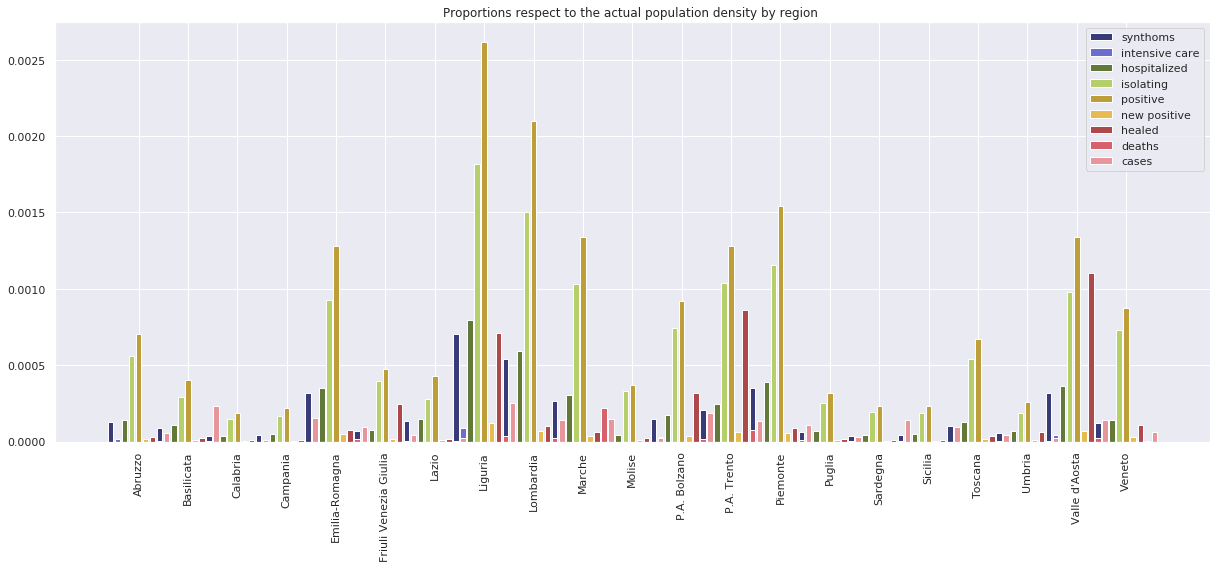

In [646]:
labels = df_divided_by_pop.index

x = np.arange(0, 21*7, step = 7)  # the label locations

fig, ax = plt.subplots(figsize=(17,8))

ax.bar(x-4, df_divided_by_pop['ricoverati_con_sintomi'], width=7./9., label='synthoms', color = sns.color_palette("tab20b")[0])
ax.bar(x-3, df_divided_by_pop['terapia_intensiva'], width=7./9., label='intensive care', color = sns.color_palette("tab20b")[2])     
ax.bar(x-2, df_divided_by_pop['totale_ospedalizzati'], width=7./9., label='hospitalized', color = sns.color_palette("tab20b")[4])   
ax.bar(x-1, df_divided_by_pop['isolamento_domiciliare'], width=7./9., label='isolating', color = sns.color_palette("tab20b")[6])
ax.bar(x, df_divided_by_pop['totale_positivi'], width=7./9., label='positive', color = sns.color_palette("tab20b")[9])
ax.bar(x+1, df_divided_by_pop['nuovi_positivi'], width=7./9., label='new positive', color = sns.color_palette("tab20b")[10])
ax.bar(x+2, df_divided_by_pop['dimessi_guariti_daily'], width=7./9., label='healed', color = sns.color_palette("tab20b")[13])
ax.bar(x+3, df_divided_by_pop['deceduti_daily'], width=7./9., label='deaths', color = sns.color_palette("tab20b")[14])
ax.bar(x+4, df_divided_by_pop['totale_casi_daily'], width=7./9., label='cases', color = sns.color_palette("tab20b")[15])  

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Proportions respect to the actual population density by region ')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)
ax.legend()

fig.tight_layout()
plt.show(); # click twice to zoom

### Boxplots of each count

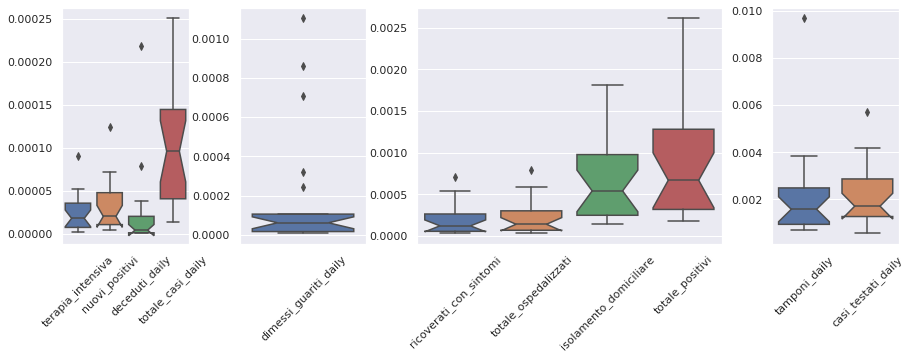

In [647]:
fig = plt.figure(figsize=(15, 10))
grid = plt.GridSpec(2, 5, wspace=0.4, hspace=0.3)

# boxplots for low values
low_val = plt.subplot(grid[0, 0])
sns.boxplot(data=df_divided_by_pop[['terapia_intensiva', 'nuovi_positivi', 
                                    'deceduti_daily', 'totale_casi_daily']], ax=low_val, notch=True)
low_val.set_xticklabels(low_val.get_xticklabels(),rotation=45);

# boxplots for medium-high
medium_low_val = plt.subplot(grid[0, 2:4])
sns.boxplot(data=df_divided_by_pop[['ricoverati_con_sintomi', 'totale_ospedalizzati', 'isolamento_domiciliare',
                                   'totale_positivi']], ax=medium_low_val, notch=True)
medium_low_val.set_xticklabels(medium_low_val.get_xticklabels(),rotation=45);

# boxplots for medium-low
medium_high_val = plt.subplot(grid[0, 1])
sns.boxplot(data=df_divided_by_pop[['dimessi_guariti_daily']], ax=medium_high_val, notch=True)
medium_high_val.set_xticklabels(medium_high_val.get_xticklabels(),rotation=45);

# boxplots for high
high_val = plt.subplot(grid[0, 4])
sns.boxplot(data=df_divided_by_pop[['tamponi_daily', 'casi_testati_daily']], ax=high_val, notch=True)
high_val.set_xticklabels(high_val.get_xticklabels(),rotation=45);


The boxplots has been splitted into three plots to make them readable (they have different ranges and if put together some boxes resulted flat).

### Pie-plot of the contribution of every region in the main tallies

In [666]:
region[region['denominazione_regione']=='Marche']['deceduti']

9         0
30        0
51        0
72        0
93        0
       ... 
2718    997
2739    997
2760    997
2781    997
2802    987
Name: deceduti, Length: 134, dtype: int64

In [648]:
# new df including only some tally
some_counts = pd.DataFrame(region.groupby('denominazione_regione')['ricoverati_con_sintomi', 'terapia_intensiva',
       'isolamento_domiciliare', 'totale_positivi',
       'dimessi_guariti_daily','deceduti_daily', 'totale_casi_daily', 'tamponi_daily'].mean())

In [663]:
some_counts = some_counts.reset_index()
some_counts[some_counts['denominazione_regione']=='Marche']

,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,isolamento_domiciliare,totale_positivi,dimessi_guariti_daily,deceduti_daily,totale_casi_daily,tamponi_daily
9,Marche,359.30597,51.343284,1398.074627,1808.723881,83.753731,295.746269,200.985075,2136.776119


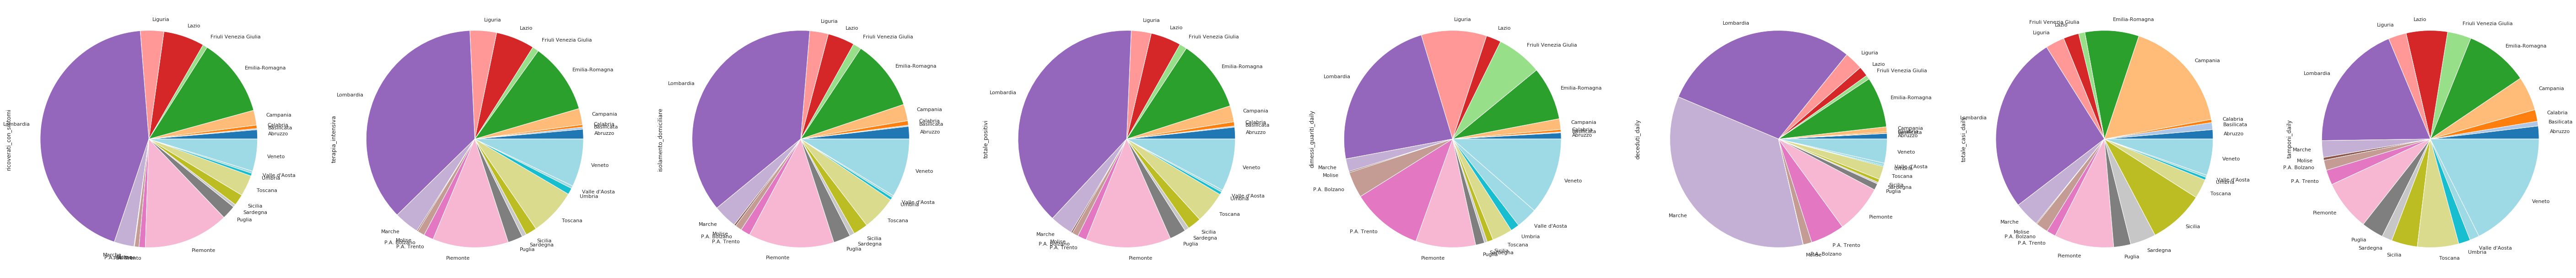

In [649]:
some_counts.plot.pie(subplots=True, figsize=(100,100), legend=False, colormap = "tab20");
#click twice on the image to zoom

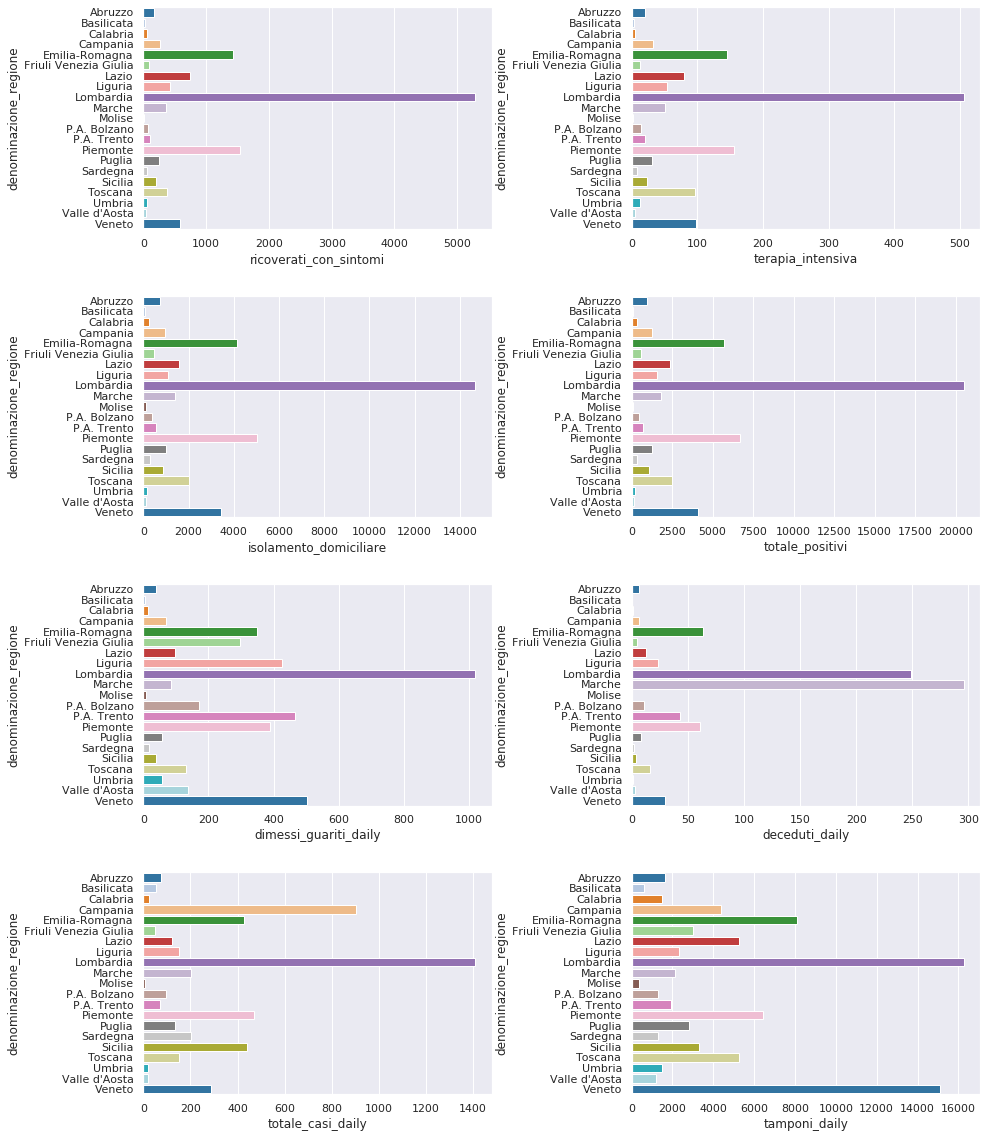

In [650]:
source_data = pd.DataFrame(some_counts).reset_index()

plt.subplots(4, 2, figsize=(15,20))
the_grid = plt.GridSpec(4, 2, wspace=0.4, hspace=0.3)
k = 0
for i in range(4):
    for j in range(2):
        plt.subplot(the_grid[i, j])
        sns.barplot(x=some_counts.columns[k], y='denominazione_regione', data=source_data, palette='tab20')
        k += 1

In every pie plot comes out that Lombardy is the italian region that the most has benn dameged by Covid-19.
The majority of hospitalized, deaths and positive cases have been registred in Lombardy with a huge difference from the other regions. 

Instead, the number of swaps in Lombardy is not as highly different as before. Veneto seem to have the same number of swaps as the Lombardy.

## Merging the two data sets
In order to make the analysis more interesting, we can merge the two datasets (regions and province) to build one hierarchical DataFrame.

In [56]:
cols_prov = ['codice_provincia', 'date', 'denominazione_provincia', 
             'denominazione_regione', 'lat', 'long', 'sigla_provincia', 'Popolazione']   # isolating variables from province
merged = pd.merge(province_pop[cols_prov], region, on = ['denominazione_regione', 'date'], 
                  suffixes = ["_prov", "_reg"])                           # merging the datasets
merged.set_index(['denominazione_regione', 'sigla_provincia', 'date'], inplace=True) 
merged

codice_provincia  \
denominazione_regione sigla_provincia date                           
Abruzzo               CH              2020-02-24                69   
                      AQ              2020-02-24                66   
                      PE              2020-02-24                68   
                      TE              2020-02-24                67   
                      CH              2020-02-25                69   
...                                                            ...   
Veneto                RO              2020-06-17                29   
                      TV              2020-06-17                26   
                      VE              2020-06-17                27   
                      VR              2020-06-17                23   
                      VI              2020-06-17                24   

                                                 denominazione_provincia  \
denominazione_regione sigla_provincia date                                 
Abruzzo               CH              2020-02-24                  Chieti   
                      AQ              2020-02-24                L'Aquila   
                      PE              2020-02-24                 Pescara   
                      TE              2020-02-24                  Teramo   
                      CH              2020-02-25                  Chieti   
...                                                                  ...   
Veneto                RO              2020-06-17                  Rovigo   
                      TV              2020-06-17                 Treviso   
                      VE              2020-06-17                 Venezia   
                      VR              2020-06-17                  Verona   
                      VI              2020-06-17                 Vicenza   

                                                   lat_prov  long_prov  \
denominazione_regione sigla_provincia date                               
Abruzzo               CH              2020-02-24  42.351032  14.167546   
                      AQ              2020-02-24  42.351222  13.398438   
                      PE              2020-02-24  42.464584  14.213648   
                      TE              2020-02-24  42.658918  13.704400   
                      CH              2020-02-25  42.351032  14.167546   
...                                                     ...        ...   
Veneto                RO              2020-06-17  45.071073  11.790070   
                      TV              2020-06-17  45.667546  12.245074   
                      VE              2020-06-17  45.434905  12.338452   
                      VR              2020-06-17  45.438390  10.993527   
                      VI              2020-06-17  45.547497  11.545971   

                                                  Popolazione stato  \
denominazione_regione sigla_provincia date                            
Abruzzo               CH              2020-02-24       385588   ITA   
                      AQ              2020-02-24       299031   ITA   
                      PE              2020-02-24       318909   ITA   
                      TE              2020-02-24       308052   ITA   
                      CH              2020-02-25       385588   ITA   
...                                                       ...   ...   
Veneto                RO              2020-06-17       234937   ITA   
                      TV              2020-06-17       887806   ITA   
                      VE              2020-06-17       853338   ITA   
                      VR              2020-06-17       926497   ITA   
                      VI              2020-06-17       862418   ITA   

                                                  codice_regione    lat_reg  \
denominazione_regione sigla_provincia date                                    
Abruzzo               CH              2020-02-24              13  42.351222   
                      AQ  

In [57]:
merged.sort_index(inplace=True)       # set multinIndex sorted by date
merged

codice_provincia  \
denominazione_regione sigla_provincia date                           
Abruzzo               AQ              2020-02-24                66   
                                      2020-02-25                66   
                                      2020-02-26                66   
                                      2020-02-27                66   
                                      2020-02-28                66   
...                                                            ...   
Veneto                VR              2020-06-13                23   
                                      2020-06-14                23   
                                      2020-06-15                23   
                                      2020-06-16                23   
                                      2020-06-17                23   

                                                 denominazione_provincia  \
denominazione_regione sigla_provincia date                                 
Abruzzo               AQ              2020-02-24                L'Aquila   
                                      2020-02-25                L'Aquila   
                                      2020-02-26                L'Aquila   
                                      2020-02-27                L'Aquila   
                                      2020-02-28                L'Aquila   
...                                                                  ...   
Veneto                VR              2020-06-13                  Verona   
                                      2020-06-14                  Verona   
                                      2020-06-15                  Verona   
                                      2020-06-16                  Verona   
                                      2020-06-17                  Verona   

                                                   lat_prov  long_prov  \
denominazione_regione sigla_provincia date                               
Abruzzo               AQ              2020-02-24  42.351222  13.398438   
                                      2020-02-25  42.351222  13.398438   
                                      2020-02-26  42.351222  13.398438   
                                      2020-02-27  42.351222  13.398438   
                                      2020-02-28  42.351222  13.398438   
...                                                     ...        ...   
Veneto                VR              2020-06-13  45.438390  10.993527   
                                      2020-06-14  45.438390  10.993527   
                                      2020-06-15  45.438390  10.993527   
                                      2020-06-16  45.438390  10.993527   
                                      2020-06-17  45.438390  10.993527   

                                                  Popolazione stato  \
denominazione_regione sigla_provincia date                            
Abruzzo               AQ              2020-02-24       299031   ITA   
                                      2020-02-25       299031   ITA   
                                      2020-02-26       299031   ITA   
                                      2020-02-27       299031   ITA   
                                      2020-02-28       299031   ITA   
...                                                       ...   ...   
Veneto                VR              2020-06-13       926497   ITA   
                                      2020-06-14       926497   ITA   
                                      2020-06-15       926497   ITA   
                                      2020-06-16       926497   ITA   
                                      2020-06-17       926497   ITA   

                                                  codice_regione    lat_reg  \
denominazione_regione sigla_provincia date                                    
Abruzzo               AQ              2020-02-24              13  42.351222   
                          

In [58]:
merged.index    # new indexes

MultiIndex([('Abruzzo', 'AQ', '2020-02-24'),
            ('Abruzzo', 'AQ', '2020-02-25'),
            ('Abruzzo', 'AQ', '2020-02-26'),
            ('Abruzzo', 'AQ', '2020-02-27'),
            ('Abruzzo', 'AQ', '2020-02-28'),
            ('Abruzzo', 'AQ', '2020-02-29'),
            ('Abruzzo', 'AQ', '2020-03-01'),
            ('Abruzzo', 'AQ', '2020-03-02'),
            ('Abruzzo', 'AQ', '2020-03-03'),
            ('Abruzzo', 'AQ', '2020-03-04'),
            ...
            ( 'Veneto', 'VR', '2020-06-08'),
            ( 'Veneto', 'VR', '2020-06-09'),
            ( 'Veneto', 'VR', '2020-06-10'),
            ( 'Veneto', 'VR', '2020-06-11'),
            ( 'Veneto', 'VR', '2020-06-12'),
            ( 'Veneto', 'VR', '2020-06-13'),
            ( 'Veneto', 'VR', '2020-06-14'),
            ( 'Veneto', 'VR', '2020-06-15'),
            ( 'Veneto', 'VR', '2020-06-16'),
            ( 'Veneto', 'VR', '2020-06-17')],
           names=['denominazione_regione', 'sigla_provincia', 'date'], length=12305

In [59]:
merged.shape    # new shape

(12305, 23)

In [60]:
merged.columns  # new variables

Index(['codice_provincia', 'denominazione_provincia', 'lat_prov', 'long_prov',
       'Popolazione', 'stato', 'codice_regione', 'lat_reg', 'long_reg',
       'ricoverati_con_sintomi', 'terapia_intensiva', 'totale_ospedalizzati',
       'isolamento_domiciliare', 'totale_positivi',
       'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti',
       'deceduti', 'totale_casi', 'tamponi', 'casi_testati', 'note_it',
       'note_en'],
      dtype='object')

The new merged dataset is composed by 23 variables.

### Italian scatterplot of cases
Let's use the latitude and longitude

In [61]:
# be sure that longitude and latitude do not change 
df_1 = merged.groupby('denominazione_provincia')['lat_prov', 'long_prov']
df_1.head()

lat_prov  long_prov
denominazione_regione sigla_provincia date                            
Abruzzo               AQ              2020-02-24  42.351222  13.398438
                                      2020-02-25  42.351222  13.398438
                                      2020-02-26  42.351222  13.398438
                                      2020-02-27  42.351222  13.398438
                                      2020-02-28  42.351222  13.398438
...                                                     ...        ...
Veneto                VR              2020-02-24  45.438390  10.993527
                                      2020-02-25  45.438390  10.993527
                                      2020-02-26  45.438390  10.993527
                                      2020-02-27  45.438390  10.993527
                                      2020-02-28  45.438390  10.993527

[535 rows x 2 columns]

In [193]:
# build an aggregated dataset in which we consider also the latitude and longitude
df_counts_merged = pd.DataFrame(merged.groupby('sigla_provincia')['ricoverati_con_sintomi', 'terapia_intensiva',
       'totale_ospedalizzati', 'isolamento_domiciliare', 'totale_positivi',
       'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti',
       'deceduti', 'totale_casi', 'tamponi', 'casi_testati', 'lat_prov', 'long_prov', 'Popolazione'].mean())

# add population density
df_counts_merged['casi_su_popolazione'] = df_counts_merged['totale_casi']/df_counts_merged['Popolazione'] 
df_counts_merged.head()

,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,casi_testati,lat_prov,long_prov,Popolazione,casi_su_popolazione
sigla_provincia,,,,,,,,,,,,,,,,
AG,234.773913,26.200000,260.973913,977.443478,1238.417391,7.000000,30.104348,804.400000,160.730435,2203.547826,68894.182609,105845.333333,37.309711,13.584575,43487.0,0.050671
AL,1743.565217,179.173913,1922.739130,5637.869565,7560.608696,20.713043,270.704348,8374.495652,2122.808696,18057.913043,141347.200000,165947.466667,44.912974,8.615401,421284.0,0.042864
AN,417.034783,59.826087,476.860870,1569.347826,2046.208696,5.086957,58.817391,1902.452174,636.130435,4584.791304,49493.991304,54420.383333,43.616760,13.518875,471228.0,0.009729
AO,46.191304,6.330435,52.521739,143.147826,195.669565,0.069565,10.356522,505.860870,91.747826,793.278261,6753.895652,9069.550000,45.737503,7.320149,125666.0,0.006313
AP,417.034783,59.826087,476.860870,1569.347826,2046.208696,5.086957,58.817391,1902.452174,636.130435,4584.791304,49493.991304,54420.383333,42.853223,13.576911,207179.0,0.022130


In [593]:
lat = df_counts_merged['lat_prov']          # y position of points
long = df_counts_merged['long_prov']        # x position of points
dim = df_counts_merged['totale_casi_daily']/100   # dimension of points

dim2 = (df_counts_merged['totale_casi_daily']/df_counts_merged['Popolazione'])*1000
fig, axs = plt.subplots(figsize=(10, 10))

axs.scatter(long, lat, s=dim2, alpha=0.5, color='red')
 # plt.scatter(long, lat, s=area2,  alpha=0.5)
axs.set_xlabel("Longitude")
axs.set_ylabel("Latitude")
axs.set_title('Number of cases for each province');

KeyError: 'totale_casi_daily'

Let's add Italy border.

In [204]:
zipconfini="http://www.istat.it/storage/cartografia/confini_amministrativi/non_generalizzati/Limiti01012018.zip"
r = requests.get(zipconfini)

In [205]:
# it create a folder in which we can find all the borderd of Italy 
# (We can choose to take only the division by north-centre-south, regions, provinces or municipalities)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [298]:
# we take the borders of provinces
province_border = gpd.read_file("Limiti/Prov/ProvCM01012018_WGS84.shx")
province_border.head(2)

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_PCM,DEN_PROV,DEN_CM,DEN_PCM,SIGLA,SHAPE_LENG,SHAPE_AREA,SHAPE_LEN,geometry
0,1,1,2,0,2,Vercelli,-,Vercelli,VC,458754.447959,2.081602e+09,458754.447958,"POLYGON ((437900.551 5088796.203, 437915.020 5..."
1,4,15,63,263,263,-,Napoli,Napoli,NA,491263.499868,1.178935e+09,491263.499868,"MULTIPOLYGON (((935240.177 4530273.402, 935241..."


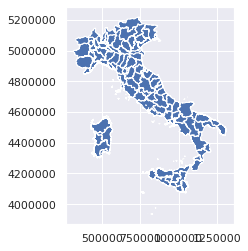

In [213]:
province_border.plot();

X and Y axes are not latitude and longitude.
It is necessary to change x and y reference to make it be compatible with our dataset 

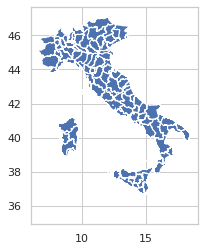

In [299]:
province_border = province_border.to_crs("EPSG:4326")    # change reference
province_border.plot();                                  # now x is longitude and y is latitude

In [300]:
# We add the the total cases 
counted = df_counts_merged.reset_index()
cases_by_province = pd.merge(province_border, counted, left_on='SIGLA', right_on='sigla_provincia')

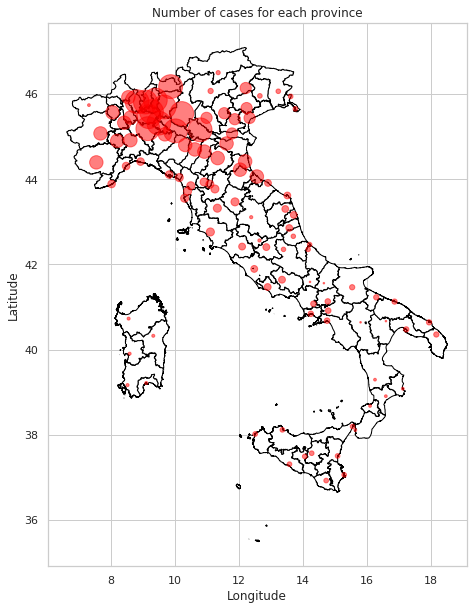

In [301]:
# The same plot as before but with italian map under the dots

lat = df_counts_merged['lat_prov']          # y position of points
long = df_counts_merged['long_prov']        # x position of points
dim = df_counts_merged['totale_casi']/100   # dimension of points

fig, axs = plt.subplots(figsize=(10, 10))

cases_by_province.plot(color='white', edgecolor='black', figsize=(10, 10), ax=axs) # italan mp
axs.scatter(long, lat, s=dim, alpha=0.5, color='red')                              # dots

axs.set_xlabel("Longitude")
axs.set_ylabel("Latitude")
axs.set_title('Number of cases for each province');

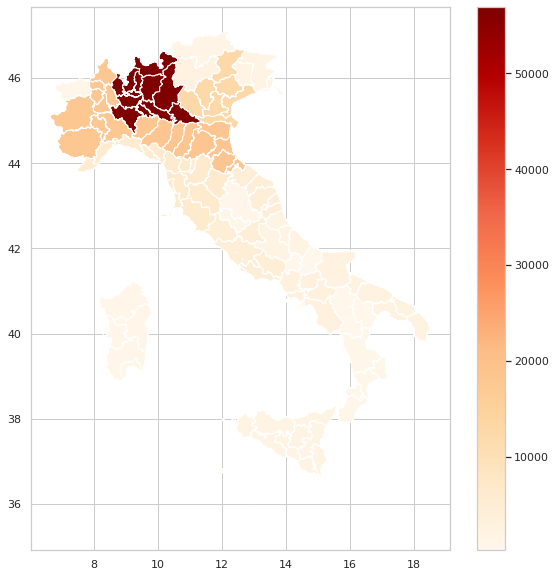

In [302]:
# Plot showing the province color intensity related to the numer of cases
cases_by_province.plot(column='totale_casi', cmap='OrRd', legend=True, figsize=(10,10));

## Pivot Tables

In [ ]:
# Build months variable
mese = list(pd.DatetimeIndex(region['date']).month)                                    # list of months numbers
monthsdic = {2: '2;Febbraio', 3: '3;Marzo', 4: '4;Aprile', 5:'5;Maggio', 6:'6;Giugno'} # dict to link numbers and 
                                                                                       # names of months
mese = [monthsdic[n] for n in mese]                                               
region['mese'] = mese

In [344]:
# Build geographical-area variable
zone = ['1;Nord-Ovest', '2;Nord-Est', '3;Centro', '4;Sud', '5;Isole']          
areageodic = {'Abruzzo': zone[2], 'Basilicata': zone[3], 'Calabria': zone[3],    # dict to link regions 
              'Campania':zone[3], 'Emilia-Romagna':zone[1],                      # to their area
              'Friuli Venezia Giulia':zone[1], 'Lazio': zone[2], 
              'Liguria':zone[0], 'Lombardia':zone[0], 
              'Marche': zone[2], 'Molise':zone[3], 'P.A. Bolzano':zone[1], 
              'P.A. Trento':zone[1], 'Piemonte': zone[0], 'Puglia':zone[3],
              'Sardegna':zone[4], 'Sicilia':zone[4], 'Toscana': zone[2],
              'Umbria': zone[2], 'Valle d\'Aosta':zone[0], 
              'Veneto':zone[1]}

area_geografica = [ areageodic[n] for n in region.denominazione_regione ]
region['area_geografica'] = area_geografica

In [346]:
# Pivot table
region.pivot_table('terapia_intensiva', index='area_geografica', columns='mese')

mese,2;Febbraio,3;Marzo,4;Aprile,5;Maggio,6;Giugno
area_geografica,,,,,
1;Nord-Ovest,9.916667,271.604839,374.958333,113.806452,36.970588
2;Nord-Est,2.566667,85.219355,129.346667,36.058065,7.023529
3;Centro,0.233333,66.490323,115.613333,35.529032,14.752941
4;Sud,0.000000,20.458065,35.426667,9.283871,2.176471
5;Isole,0.000000,19.193548,36.850000,11.467742,3.029412


Average number of people in intensive care per day by month according to areas (North-West, North-East, Center, South, Islands).

In [354]:
cut[0]

5185.0

In [360]:
cut = np.percentile(region.tamponi, [25, 75])

tamponi_cut = [0]*len(region['tamponi'])
for i in range(len(region['tamponi'])):
    if region['tamponi'][i] <= cut[0]:
        tamponi_cut[i] = 'few'
    elif region['tamponi'][i] <= cut[1]:
        tamponi_cut[i] = 'medium'
    else:
        tamponi_cut[i] = 'high'
region['tamponi_cut'] = tamponi_cut
region['tamponi_cut']

0          few
1          few
2          few
3          few
4          few
         ...  
2410      high
2411      high
2412    medium
2413    medium
2414      high
Name: tamponi_cut, Length: 2415, dtype: object

In [380]:
osped = region['totale_ospedalizzati']
da_togliere = pd.Series(list(region['totale_ospedalizzati'][1:]).insert(0, 0))
da_togliere




Series([], dtype: float64)

In [395]:
merged.index

MultiIndex([('Abruzzo', 'AQ', '2020-02-24'),
            ('Abruzzo', 'AQ', '2020-02-25'),
            ('Abruzzo', 'AQ', '2020-02-26'),
            ('Abruzzo', 'AQ', '2020-02-27'),
            ('Abruzzo', 'AQ', '2020-02-28'),
            ('Abruzzo', 'AQ', '2020-02-29'),
            ('Abruzzo', 'AQ', '2020-03-01'),
            ('Abruzzo', 'AQ', '2020-03-02'),
            ('Abruzzo', 'AQ', '2020-03-03'),
            ('Abruzzo', 'AQ', '2020-03-04'),
            ...
            ( 'Veneto', 'VR', '2020-06-08'),
            ( 'Veneto', 'VR', '2020-06-09'),
            ( 'Veneto', 'VR', '2020-06-10'),
            ( 'Veneto', 'VR', '2020-06-11'),
            ( 'Veneto', 'VR', '2020-06-12'),
            ( 'Veneto', 'VR', '2020-06-13'),
            ( 'Veneto', 'VR', '2020-06-14'),
            ( 'Veneto', 'VR', '2020-06-15'),
            ( 'Veneto', 'VR', '2020-06-16'),
            ( 'Veneto', 'VR', '2020-06-17')],
           names=['denominazione_regione', 'sigla_provincia', 'date'], length=12305

In [390]:
merged.loc[('Abruzzo', 'AQ')]

,codice_provincia,denominazione_provincia,lat_prov,long_prov,Popolazione,stato,codice_regione,lat_reg,long_reg,ricoverati_con_sintomi,...,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,casi_testati,note_it,note_en
date,,,,,,,,,,,,,,,,,,,,,
2020-02-24,66,L'Aquila,42.351222,13.398438,299031,ITA,13,42.351222,13.398438,0,...,0,0,0,0,0,0,5,NaN,,
2020-02-25,66,L'Aquila,42.351222,13.398438,299031,ITA,13,42.351222,13.398438,0,...,0,0,0,0,0,0,5,NaN,,
2020-02-26,66,L'Aquila,42.351222,13.398438,299031,ITA,13,42.351222,13.398438,0,...,0,0,0,0,0,0,13,NaN,,
2020-02-27,66,L'Aquila,42.351222,13.398438,299031,ITA,13,42.351222,13.398438,1,...,1,1,1,0,0,1,33,NaN,,
2020-02-28,66,L'Aquila,42.351222,13.398438,299031,ITA,13,42.351222,13.398438,1,...,1,0,0,0,0,1,33,NaN,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-13,66,L'Aquila,42.351222,13.398438,299031,ITA,13,42.351222,13.398438,72,...,509,-19,4,2312,454,3275,90340,61177.0,,
2020-06-14,66,L'Aquila,42.351222,13.398438,299031,ITA,13,42.351222,13.398438,71,...,511,2,4,2312,456,3279,91445,61873.0,,
2020-06-15,66,L'Aquila,42.351222,13.398438,299031,ITA,13,42.351222,13.398438,71,...,486,-25,0,2337,456,3279,91700,62048.0,,


In [435]:
display(dailyincr.iloc[9], dailyincr.iloc[30], 
        dailyincr.iloc[51], dailyincr.iloc[72])


ricoverati_con_sintomi            76
terapia_intensiva                 19
totale_ospedalizzati              95
isolamento_domiciliare            71
totale_positivi                  166
dimessi_guariti                    0
deceduti                           6
totale_casi                      172
tamponi                         1463
casi_testati                     NaN
date                      2020-02-24
denominazione_regione      Lombardia
Name: 9, dtype: object

ricoverati_con_sintomi             3
terapia_intensiva                  6
totale_ospedalizzati               9
isolamento_domiciliare            56
totale_positivi                   65
dimessi_guariti                    0
deceduti                           3
totale_casi                       68
tamponi                         2237
casi_testati                     NaN
date                      2020-02-25
denominazione_regione      Lombardia
Name: 30, dtype: object

ricoverati_con_sintomi             0
terapia_intensiva                  0
totale_ospedalizzati               0
isolamento_domiciliare            18
totale_positivi                   18
dimessi_guariti                    0
deceduti                           0
totale_casi                       18
tamponi                         -492
casi_testati                     NaN
date                      2020-02-26
denominazione_regione      Lombardia
Name: 51, dtype: object

ricoverati_con_sintomi            93
terapia_intensiva                 16
totale_ospedalizzati             109
isolamento_domiciliare            -9
totale_positivi                  100
dimessi_guariti                   40
deceduti                           5
totale_casi                      145
tamponi                          112
casi_testati                     NaN
date                      2020-02-27
denominazione_regione      Lombardia
Name: 72, dtype: object

In [429]:
display(region.iloc[9], region.iloc[30], region.iloc[51], region.iloc[72])


stato                                  ITA
codice_regione                           3
denominazione_regione            Lombardia
lat                                45.4668
long                               9.19035
ricoverati_con_sintomi                  76
terapia_intensiva                       19
totale_ospedalizzati                    95
isolamento_domiciliare                  71
totale_positivi                        166
variazione_totale_positivi               0
nuovi_positivi                         166
dimessi_guariti                          0
deceduti                                 6
totale_casi                            172
tamponi                               1463
casi_testati                           NaN
note_it                                   
note_en                                   
date                            2020-02-24
mese                            2;Febbraio
area_geografica               1;Nord-Ovest
tamponi_cut                            few
Name: 9, dt

stato                                  ITA
codice_regione                           3
denominazione_regione            Lombardia
lat                                45.4668
long                               9.19035
ricoverati_con_sintomi                  79
terapia_intensiva                       25
totale_ospedalizzati                   104
isolamento_domiciliare                 127
totale_positivi                        231
variazione_totale_positivi              65
nuovi_positivi                          68
dimessi_guariti                          0
deceduti                                 9
totale_casi                            240
tamponi                               3700
casi_testati                           NaN
note_it                                   
note_en                                   
date                            2020-02-25
mese                            2;Febbraio
area_geografica               1;Nord-Ovest
tamponi_cut                            few
Name: 30, d

stato                                  ITA
codice_regione                           3
denominazione_regione            Lombardia
lat                                45.4668
long                               9.19035
ricoverati_con_sintomi                  79
terapia_intensiva                       25
totale_ospedalizzati                   104
isolamento_domiciliare                 145
totale_positivi                        249
variazione_totale_positivi              18
nuovi_positivi                          18
dimessi_guariti                          0
deceduti                                 9
totale_casi                            258
tamponi                               3208
casi_testati                           NaN
note_it                                   
note_en                                   
date                            2020-02-26
mese                            2;Febbraio
area_geografica               1;Nord-Ovest
tamponi_cut                            few
Name: 51, d

stato                                  ITA
codice_regione                           3
denominazione_regione            Lombardia
lat                                45.4668
long                               9.19035
ricoverati_con_sintomi                 172
terapia_intensiva                       41
totale_ospedalizzati                   213
isolamento_domiciliare                 136
totale_positivi                        349
variazione_totale_positivi             100
nuovi_positivi                         145
dimessi_guariti                         40
deceduti                                14
totale_casi                            403
tamponi                               3320
casi_testati                           NaN
note_it                                   
note_en                                   
date                            2020-02-27
mese                            2;Febbraio
area_geografica               1;Nord-Ovest
tamponi_cut                            few
Name: 72, d

In [397]:
n = len(region.denominazione_regione.unique())
n

21

In [ ]:
cols = ['ricoverati_con_sintomi', 'terapia_intensiva',
       'totale_ospedalizzati', 'isolamento_domiciliare', 'totale_positivi','dimessi_guariti',
       'deceduti', 'totale_casi', 'tamponi', 'casi_testati']

for var in cols:
    prova = []
    for i in range(1, dailyincr.shape[0]):
        prova.append(region[var].values[i] - region[var].values[i-1])
    region[var+'']
dailyincr

In [375]:
list(region['totale_ospedalizzati'][1:]).insert(0, 0)

In [370]:
region[region['denominazione_regione']=='Toscana'][['ricoverati_con_sintomi', 'terapia_intensiva',
       'totale_ospedalizzati', 'isolamento_domiciliare', 'totale_positivi',
       'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti',
       'deceduti', 'totale_casi', 'tamponi', 'casi_testati']].tail(50)

,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,casi_testati
1381,576,139,715,4948,5663,-233,61,2802,827,9292,137482,106150.0
1402,546,126,672,4912,5584,-79,60,2926,842,9352,141849,108596.0
1423,520,124,644,4729,5373,-211,93,3218,854,9445,146456,111349.0
1444,519,118,637,4728,5365,-8,80,3297,863,9525,148223,112437.0
1465,513,112,625,4703,5328,-37,38,3363,872,9563,150914,114354.0
1486,512,107,619,4660,5279,-49,38,3441,881,9601,152447,115065.0
1507,484,111,595,4595,5190,-89,30,3552,889,9631,157260,118265.0
1528,462,92,554,4534,5088,-102,26,3670,899,9657,161553,121066.0
1549,437,91,528,4188,4716,-372,26,4052,915,9683,166062,124295.0
1570,399,84,483,4109,4592,-124,38,4199,930,9721,170296,126752.0


In [363]:
region.pivot_table('totale_casi', index='area_geografica', columns=['mese', 'tamponi_cut'])

mese            2;Febbraio            3;Marzo                         \
tamponi_cut            few medium         few      high       medium   
area_geografica                                                        
1;Nord-Ovest     75.173913  615.0  323.573529  41447.75  9536.807692   
2;Nord-Est       26.000000  151.0  329.064935   8939.50  3566.394737   
3;Centro          2.366667    NaN  290.281250       NaN  1989.711864   
4;Sud             0.966667    NaN  115.038760       NaN  1167.307692   
5;Isole           1.500000    NaN  175.549020       NaN  1122.545455   

mese               4;Aprile                                 5;Maggio  \
tamponi_cut             few          high       medium          high   
area_geografica                                                        
1;Nord-Ovest     901.863636  51689.073171  8390.210526  52971.537313   
2;Nord-Est              NaN  17775.041667  4364.666667  18688.696203   
3;Centro                NaN   7654.833333  3714.000000   8461.492537   
4;Sud            261.974359           NaN  2176.117117   4622.305556   
5;Isole                 NaN           NaN  1822.416667   3393.041667   

mese                              6;Giugno               
tamponi_cut           medium          high       medium  
area_geografica                                          
1;Nord-Ovest     4712.719298  43783.039216  1189.705882  
2;Nord-Est       3389.592105  15135.372881  3237.807692  
3;Centro         3544.386364   8250.901961  2349.558824  
4;Sud            1446.386555   4629.235294   665.803922  
5;Isole          1693.921053   3452.764706  1361.176471